# **Document Embedding with TF-IDF**

The goal of this project is to embed documents using TF-IDF and cluster the embeddings. The dataset consists of news articles and their associated categories. To evaluate the embedding, several cluster metrics and the cosine similarity are measured.

# **Preprocessing Steps**

This section outlines the steps that occur prior to the generation of embeddings. These steps are necessary to ensure the successful generation of the embeddings.

## **Import Statements**

In [ ]:
#Initializes a WordNetLemmatizer for reducing words to their base forms
from nltk.stem import WordNetLemmatizer
#Initializes a PorterStemmer which reduces words to their root forms
from nltk.stem import PorterStemmer
#Imports the Natural Language Toolkit (NLTK) for text processing
import nltk
#Imports a list of stopwords for text processing
from nltk.corpus import stopwords
#Imports the pandas library for data manipulation and analysis
import pandas as pd
#Library for numerical computations
import numpy as np
#Imports the regular expression module for string pattern matching.
import re
#Imports a module for vreating dictionaries with default values
from collections import defaultdict
#Imports the time function for time related operations
from time import time
#Imports the metrics module from scikit-learn library for evaluating machine learning models
from sklearn import metrics
#Imports the TfidfVectorizer class for generating TF-IDF vectors from text data
from sklearn.feature_extraction.text import TfidfVectorizer
#Imports TSNE class for dimensionality reduction
from sklearn.manifold import TSNE
#Imports the pyplot module for creating visualizations
import matplotlib.pyplot as plt
#Imports the seaborn library for statistical data visualization
import seaborn as sns
#Imports KMeans class for K-means clustering
from sklearn.cluster import KMeans
#Imports the cosine_similarity for computing cosine similarity between pairs of samples
from sklearn.metrics.pairwise import cosine_similarity
#Imports Counter class for counting hashable objects
from collections import Counter
#Imports silhouette_samples and silhouette_score for measuring the quality of clustering
from sklearn.metrics import silhouette_samples, silhouette_score
#Imports the cm module for handling colormaps
import matplotlib.cm as cm
#Imports the drive module for accessing Google Drive files in Google Colab environment.
from google.colab import drive
#Import the LabelEncoder class to convert categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
#Import the TruncatedSVD class for dimensionality reduction, especially for sparse matrices
from sklearn.decomposition import TruncatedSVD

## **Download Statements**

In [ ]:
#Downloads the WordNet dataset for the NLTK library for using certain features like lemmatization
nltk.download('wordnet')
#Downloads the stopwords dataset for the NLTK library, which contains common words
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

In this section, the various datasets used are preprocessed to ensure that the model can effectively work with the data.

### Dataset One

The dataset consists of 252 different news articles and eight categories. The dataset is stored in the path variable.

In [ ]:
#Mounts the Google Drive at ("/content/drive") in the Google Colab enviornment
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Implementation/Dataset/NewsTwo.csv"

Mounted at /content/drive


In [ ]:
#Read a CSV file into a pandas DataFrame object using the latin1 encoding
news_df = pd.read_csv(path,encoding='latin1')

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Save the original 'News' column for comparison later
news_df['Original_News'] = news_df['News']
news_df['Preprocessed_News'] = news_df['News']

#Convert to lowercase
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].str.lower()
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].fillna('')  # NaN-Werte durch leere Strings ersetzen
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].astype(str)  # Sicherstellen, dass alle Einträge Strings sind

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_df.isnull().values.any():
    news_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data = news_df['Preprocessed_News']
labels = news_df['Category']
print(f"{len(text_data)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

#Display the total number of documents an categories
print(f"{len(news_df)} documents - {true_k} categories")

252 documents 
252 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df = news_df[['Original_News', 'Preprocessed_News']]
comparison_df.head(10)

,Original_News,Preprocessed_News
0,The IMF now expects China's economy to grow by...,imf expect china economi grow year higher prev...
1,Manufacturing activity in the Eurozone has dec...,manufactur activ eurozon declin retail sale fa...
2,Continued disruptions in the global supply cha...,continu disrupt global suppli chain includ rec...
3,Concerns about food security remain high due t...,concern food secur remain high due war ukrain ...
4,"While some central banks, like the US Federal ...",central bank like u feder reserv continu rais ...
5,Bangladeshi workers abroad continue to send st...,bangladeshi worker abroad continu send strong ...
6,The Centre for Economics and Business Research...,centr econom busi research cebr predict bangla...
7,Bangladesh has maintained macroeconomic stabil...,bangladesh maintain macroeconom stabil despit ...
8,Government investments in infrastructure proje...,govern invest infrastructur project like road ...
9,"he US unemployment rate has dropped to 3.5%, i...",u unemploy rate drop lowest level decad reflec...


### Dataset Two

The dataset consists of 50000 different news articles and ten categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the CSV file
df_two = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewsCategorizer.csv")

news_two_df = df_two.drop(['headline','links','keywords'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_two_df['short_description'] = news_two_df['short_description'].str.lower()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_two_df['short_description'] = news_two_df['short_description'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_two_df.isnull().values.any():
    news_two_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_two = news_two_df['short_description']
labels_two = news_two_df['category']
print(f"{len(text_data_two)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_two, category_sizes_two = np.unique(labels_two, return_counts=True)
true_k_two = unique_labels_two.shape[0]

#Display the total number of documents an categories
print(f"{len(news_two_df)} documents - {true_k_two} categories")

50000 documents 
50000 documents - 10 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_two_df['Original_News'] = df_two['short_description']
news_two_df['Preprocessed_News'] = news_two_df['short_description']
news_two_df['News'] = news_two_df['short_description']

In [ ]:
news_two_df['Category'] = news_two_df['category']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_two = news_two_df[['Original_News', 'Preprocessed_News']]
comparison_df_two.head(10)

,Original_News,Preprocessed_News
0,Resting is part of training. I've confirmed wh...,rest part train ive confirm sort alreadi knew ...
1,Think of talking to yourself as a tool to coac...,think talk tool coach challeng narrat experi c...
2,The clock is ticking for the United States to ...,clock tick unit state find cure team work stud...
3,"If you want to be busy, keep trying to be perf...",want busi keep tri perfect want happi focu mak...
4,"First, the bad news: Soda bread, corned beef a...",first bad news soda bread corn beef beer highl...
5,"By Carey Moss for YouBeauty.com Love rom-coms,...",carey moss youbeautycom love romcom love song ...
6,The nation in general scored a 66.2 in 2011 on...,nation gener score scale littl bit score
7,It's also worth remembering that if the water ...,also worth rememb water seawe come contamin sa...
8,"If you look at our culture's eating behavior, ...",look cultur eat behavior certainli look like a...
9,"François-Marie Arouet, 18th century French aut...",franoismari arouet th centuri french author ic...


### Dataset Three

The dataset consists of around 100000 different news articles and eight categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the CSV file
df_three = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewNews.csv",delimiter=";")

news_three_df = df_three.drop(['link','domain','published_date','lang'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_three_df['title'] = news_three_df['title'].str.lower()

#news_three_df = news_three_df.groupby('topic').apply(lambda x: x.sample(min(len(x), 1000))).reset_index(drop=True)

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_three_df['title'] = news_three_df['title'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_three_df.isnull().values.any():
    news_three_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_three = news_three_df['title']
labels_three = news_three_df['topic']
print(f"{len(text_data_three)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_three, category_sizes_three = np.unique(labels_three, return_counts=True)
true_k_three = unique_labels_three.shape[0]

#Display the total number of documents an categories
print(f"{len(news_three_df)} documents - {true_k_three} categories")

108774 documents 
108774 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_three_df['Original_News'] = df_three['title']
news_three_df['Preprocessed_News'] = news_three_df['title']
news_three_df['News'] = news_three_df['title']

In [ ]:
news_three_df['Category'] = news_three_df['topic']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_three = news_three_df[['Original_News', 'Preprocessed_News']]
comparison_df_three.head(10)

,Original_News,Preprocessed_News
0,A closer look at water-splitting's solar fuel ...,closer look watersplit solar fuel potenti
1,An irresistible scent makes locusts swarm stud...,irresist scent make locust swarm studi find
2,Artificial intelligence warning: AI will know ...,artifici intellig warn ai know u better know
3,Glaciers Could Have Sculpted Mars Valleys: Study,glacier could sculpt mar valley studi
4,Perseid meteor shower 2020: What time and how ...,perseid meteor shower time see huge bright fir...
5,NASA Releases In-Depth Map of Beirut Explosion...,nasa releas indepth map beirut explos damag
6,"SpaceX, NASA Demo-2 Rocket Launch Set for Satu...",spacex nasa demo rocket launch set saturday watch
7,Orbital space tourism set for rebirth in 2021,orbit space tourism set rebirth
8,Greenland's melting ice sheet has 'passed the ...,greenland melt ice sheet pass point return
9,NASA invites engineering students to help harv...,nasa invit engin student help harvest water ma...


# **TF-IDF On First Dataset**

## **TF-IDF**

The TF-IDF vectorizer is initialized with various parameters. The "max_df" parameter ignores words that appear in more than 95% of the documents and "min_df" parameter ignores words that appear in only one document. "stop_word" also removes common English stopwords

In [ ]:
#Initialize TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer(
    min_df=1,
    max_df=0.95,
    max_features=768,
    stop_words='english',
    use_idf=True
)
#Record the start time for vectorization
t0 = time()

#Transform the input into TF-IDF weighted vectors
X_tfidf = vectorizer.fit_transform(news_df['Preprocessed_News'])

#Display the time for the vectorization and the shape of the resulting matrix
print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.047 s
n_samples: 252, n_features: 768


TF-IDF values ​​of the first document. The 0 in the tuple represents the document and the second number in the tuple represents, for example, the 278th feature in the vocabulary.

In [ ]:
#Display the TF-IDF Value of the first document
print("First document: " + text_data[0])
print("TF-IDF values for the document: ")
print(X_tfidf[0])

First document: imf expect china economi grow year higher previou estim reflect china shift away zerocovid polici increas govern stimulu
TF-IDF values for the document: 
  (0, 278)	0.23085754504193062
  (0, 331)	0.2187784629791556
  (0, 512)	0.2994238809085206
  (0, 39)	0.28644286803082286
  (0, 567)	0.3161593172013711
  (0, 527)	0.3161593172013711
  (0, 305)	0.28644286803082286
  (0, 765)	0.21525172428619394
  (0, 284)	0.23551389927200608
  (0, 194)	0.24057564449635338
  (0, 103)	0.47102779854401217
  (0, 211)	0.25224933556485646


In the first document the 103th feature has the highest TF-IDF score. The 103th feature represents the word 'china'.

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
print(feature_names[103])

china


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(X_tfidf[40])
print("Embedding of second document:")
print(X_tfidf[216])

First news article:
conor mcgregor ufc biggest star announc return octagon mcgregor sidelin sinc suffer leg injuri juli fulli recov readi get back cage oppon fight date yet determin mcgregor return sure gener excit among mma fan
Second news article:
highli anticip rubber match ufc star dustin poirier conor mcgregor final happen promis electrifi showdown
Embedding of first document:
  (0, 223)	0.15266655731129325
  (0, 208)	0.19800961266736095
  (0, 265)	0.19800961266736095
  (0, 374)	0.18942524282971177
  (0, 342)	0.19800961266736095
  (0, 669)	0.20907679023553571
  (0, 644)	0.18942524282971177
  (0, 638)	0.20907679023553571
  (0, 590)	0.3648226039332659
  (0, 28)	0.17134412439845814
  (0, 724)	0.20907679023553571
  (0, 438)	0.6272303707066071
  (0, 655)	0.15266655731129325
  (0, 553)	0.20907679023553571
  (0, 232)	0.18241130196663294
Embedding of second document:
  (0, 292)	0.41109096183480837
  (0, 234)	0.33690024045401296
  (0, 724)	0.41109096183480837
  (0, 438)	0.41109096183480837

In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(X_tfidf[138])
print("Embedding of second document:")
print(X_tfidf[139])

First news article:
ai big data expo took place london decemb brought togeth expert around world discu latest advanc artifici intellig big data one key theme expo use ai get valu realtim data stream
Second news article:
ai big data expo also focus ethic implic ai big data one session expo discuss import use data good improv healthcar educ
Embedding of first document:
  (0, 380)	0.20139541330892535
  (0, 555)	0.21265183046201655
  (0, 212)	0.1855303843935288
  (0, 421)	0.21265183046201655
  (0, 214)	0.3589975606644238
  (0, 153)	0.48544055212022424
  (0, 49)	0.3589975606644238
  (0, 705)	0.21265183046201655
  (0, 159)	0.1855303843935288
  (0, 505)	0.19266425784550675
  (0, 396)	0.1742739672404376
  (0, 14)	0.26257498451310646
  (0, 743)	0.14254390940964443
  (0, 762)	0.14254390940964443
  (0, 10)	0.19266425784550675
  (0, 350)	0.15527702920064718
  (0, 33)	0.15237733426372413
Embedding of second document:
  (0, 325)	0.2287664451653177
  (0, 203)	0.19310107888041436
  (0, 174)	0.19310107

Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf[40].reshape(1, -1), X_tfidf[216].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.3896251570184696


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf[138].reshape(1, -1), X_tfidf[139].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.6268301719762359


Cosine similarity between sports and AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf[139].reshape(1, -1), X_tfidf[216].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.0


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(X_tfidf)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
embeddings_2d = tsne.fit_transform(X_tfidf)

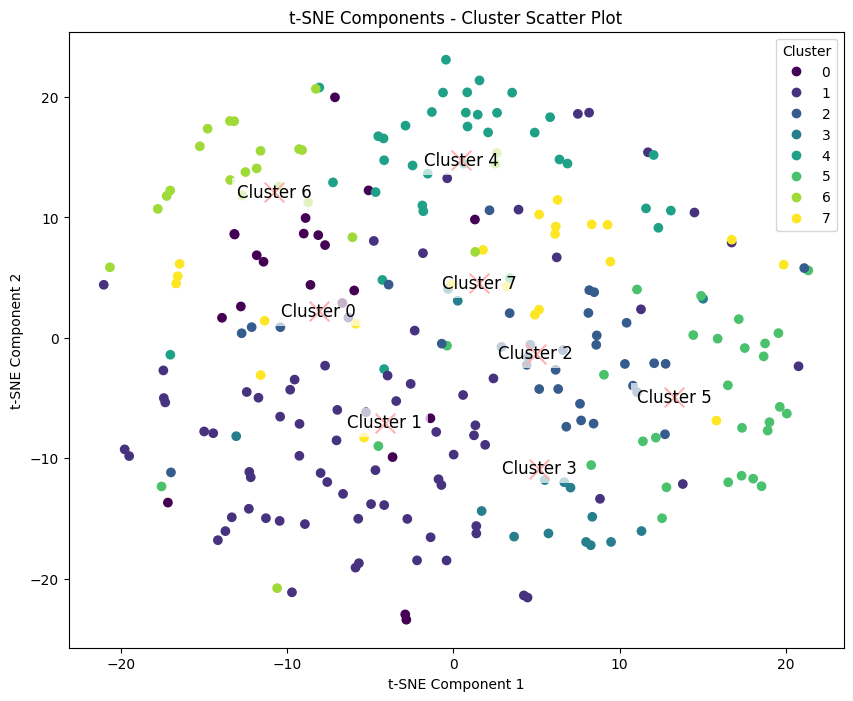

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [21 74 33 15 34 30 23 22]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_tfidf, cluster_sizes_tfidf = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_tfidf}")


## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters





In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 1.05 ± 0.44 s 
Homogeneity: 0.359 ± 0.030
Completeness: 0.378 ± 0.029
V-measure: 0.368 ± 0.029
Adjusted Rand-Index: 0.231 ± 0.025
Silhouette Coefficient: 0.015 ± 0.001


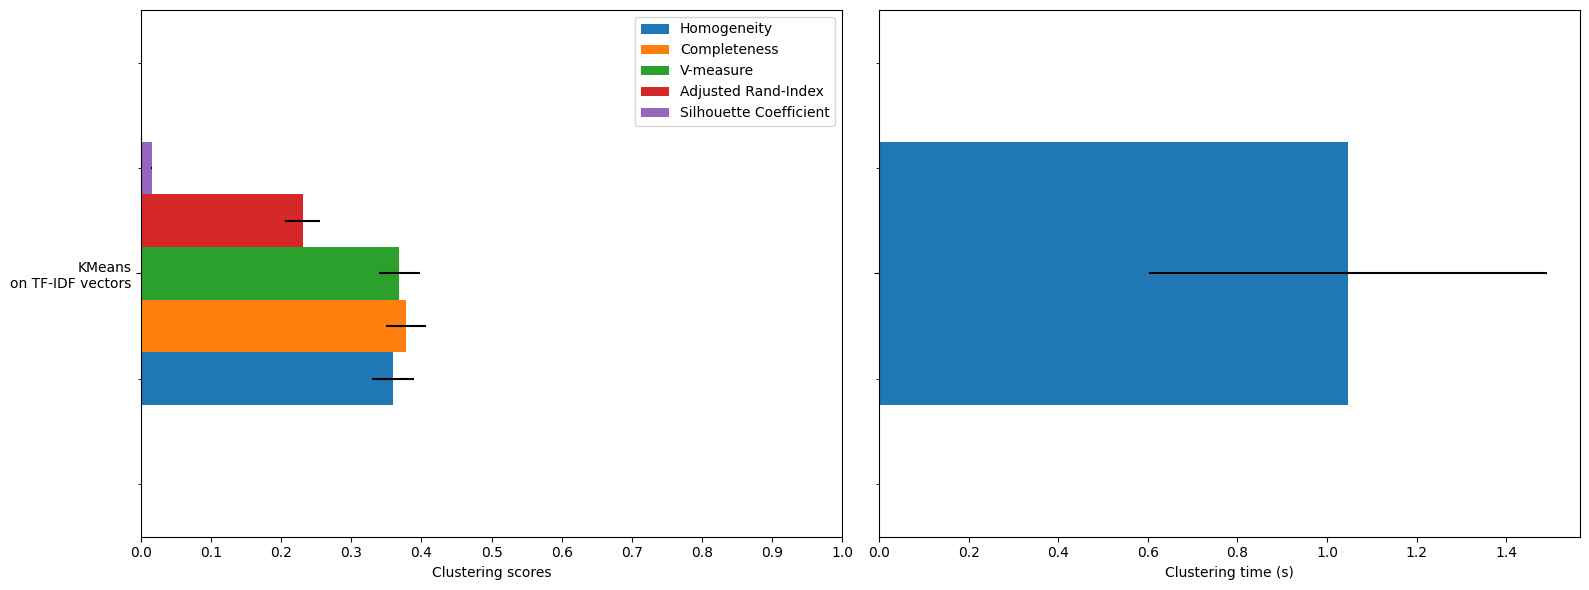

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non TF-IDF vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

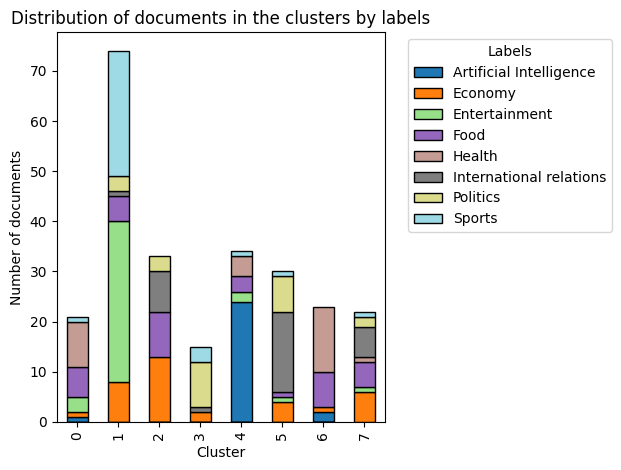

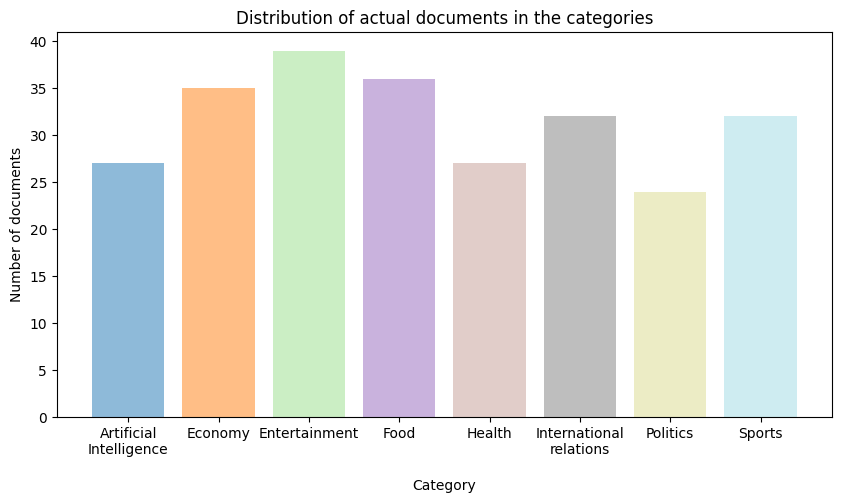


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  1        1              3     6       9   
1                                  0        8             32     5       0   
2                                  0       13              0     9       0   
3                                  0        2              0     0       0   
4                                 24        0              2     3       4   
5                                  0        4              1     1       0   
6                                  2        1              0     7      13   
7                                  0        6              1     5       1   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 0        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_tfidf):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the TF-IDF vectors of the documents in the current category.
        category_tfidf = X_tfidf[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_tfidf)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.05416122652824646
Average Cosine Similarity for Health: 0.0825339361997615
Average Cosine Similarity for Sports: 0.04019844955529012
Average Cosine Similarity for Entertainment: 0.03724003599237147
Average Cosine Similarity for Politics: 0.04892724777354195
Average Cosine Similarity for International relations: 0.04684557717685691
Average Cosine Similarity for Food: 0.04423662857285693
Average Cosine Similarity for Artificial Intelligence : 0.11084631103630987


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = X_tfidf[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = X_tfidf[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.013744034048454371
Average Cosine Similarity between Sports and Entertainment: 0.013632787061364265
Average Cosine Similarity between Politics and International relations: 0.03337402849310233
Average Cosine Similarity between Food and Artificial Intelligence : 0.015071074268796721


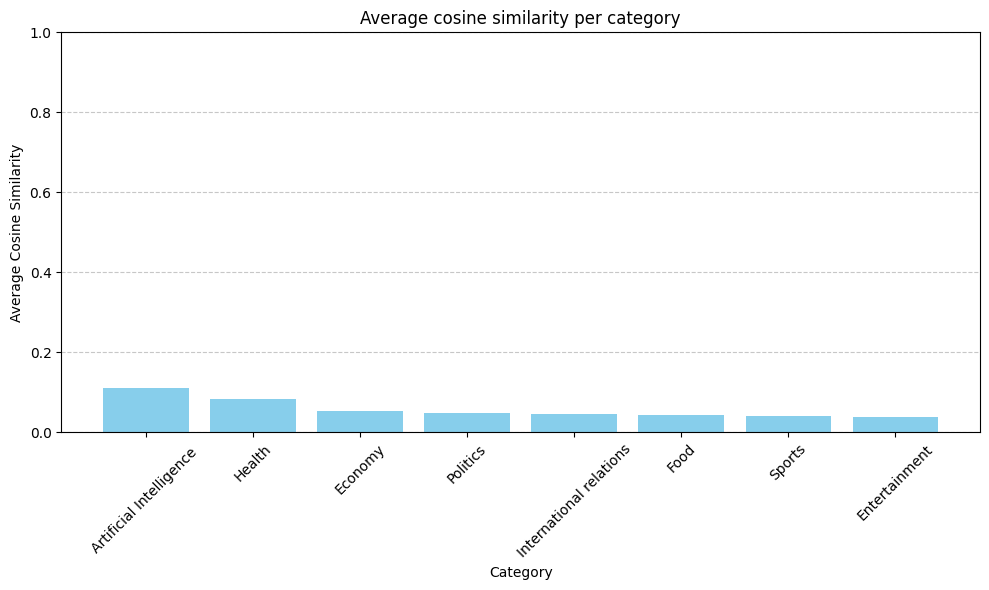

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

Now we want to show the top ten terms for each cluster.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10

#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, X_tfidf)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

 The most important words in these documents are based on their TF-IDF value. We create a heatmap which visually represents the top words for each cluster

Top words for Cluster 0: new, therapi, treatment, promis, cancer, gene, melanoma, ugli, earli, infect
Top words for Cluster 1: world, rise, bigg, bo, movement, contest, boom, success, qualifi, championship
Top words for Cluster 2: includ, rise, altern, plantbas, meat, ukrain, war, lead, food, african
Top words for Cluster 3: elect, boost, republican, hous, invest, victori, repres, power, defeat, presid
Top words for Cluster 4: ai, offer, articl, seek, market, exampl, glimps, reveal, marin, new
Top words for Cluster 5: nuclear, iran, program, countri, korea, missil, north, sanction, china, deal
Top words for Cluster 6: studi, diseas, pollut, air, risk, peopl, coffe, heart, drug, parkinson
Top words for Cluster 7: climat, chang, food, global, like, extrem, weather, event, econom, worldwid


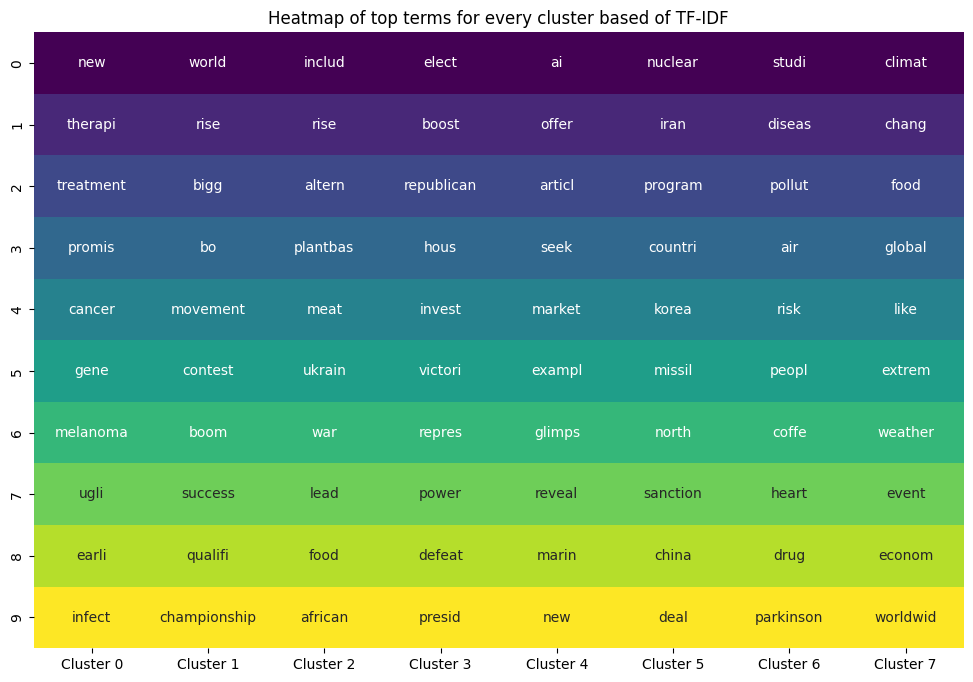

In [ ]:
#Retrieve the feature names (terms) from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

#Extract the most important words based on TF-IDF for the top documents in each cluster
num_top_terms = 10
top_words_per_cluster = []

for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    #Extract the TF-IDF values ​​for the top documents in the cluster
    cluster_tfidf = X_tfidf[top_document_indices]

    #Sum the TF-IDF values ​​for each word across all top documents
    summed_tfidf = np.sum(cluster_tfidf.toarray(), axis=0)

    #Choose the words with the highest TF-IDF values
    top_term_indices = np.argsort(summed_tfidf)[::-1][:num_top_terms]
    top_words = [terms[i] for i in top_term_indices]
    top_words_per_cluster.append(top_words)

#Output the top words for each cluster
for i, top_words in enumerate(top_words_per_cluster):
    print(f"Top words for Cluster {i}: {', '.join(top_words)}")

#Create the heatmap
heatmap_df = pd.DataFrame(top_words_per_cluster, index=[f'Cluster {i}' for i in range(true_k)])
heatmap_df = heatmap_df.T

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_df.apply(lambda x: pd.factorize(x)[0]),
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False
)
plt.title("Heatmap of top terms for every cluster based of TF-IDF")
plt.show()


# **TF-IDF On The Second Dataset**

## **TF-IDF**

The TF-IDF vectorizer is initialized with various parameters. The "max_df" parameter ignores words that appear in more than 95% of the documents and "min_df" parameter ignores words that appear in less than 5 documents. "stop_word" also removes common English stopwords

In [ ]:
#Initialize TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.95,
    max_features=768,
    stop_words='english',
    use_idf=True
)
#Record the start time for vectorization
t0 = time()

#Transform the input into TF-IDF weighted vectors
X_tfidf_two = vectorizer.fit_transform(news_two_df['Preprocessed_News'])

#Display the time for the vectorization and the shape of the resulting matrix
print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf_two.shape[0]}, n_features: {X_tfidf_two.shape[1]}")

vectorization done in 0.822 s
n_samples: 50000, n_features: 768


TF-IDF values ​​of the first document. The 0 in the tuple represents the document and the second number in the tuple represents, for example, the 410th feature in the vocabulary.

In [ ]:
#Display the TF-IDF Value of the first document
print("First document: " + text_data_two[0])
print("TF-IDF values for the document: ")
print(X_tfidf_two[0])

First document: rest part train ive confirm sort alreadi knew im built run streak im built hard workout three five day week lot cross train physic therapi foam roll ive also confirm im stubborn
TF-IDF values for the document: 
  (0, 410)	0.19287862628206484
  (0, 738)	0.1609177897104749
  (0, 165)	0.14723824933944274
  (0, 304)	0.2002295145586496
  (0, 584)	0.20237247296637714
  (0, 334)	0.5626943191387052
  (0, 370)	0.2319173704853409
  (0, 25)	0.20772815126407843
  (0, 358)	0.40150644764367244
  (0, 698)	0.4559353858065821
  (0, 570)	0.2270058814509877


In the seconfd document the 334th feature has the highest TF-IDF score. The 334th feature represents the word 'im'.

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
print(feature_names[334])

im


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data_two[49085])
print("Second news article:")
print(text_data_two[48331])
print("Embedding of first document:")
print(X_tfidf_two[49085])
print("Embedding of second document:")
print(X_tfidf_two[48331])

First news article:
nba would allow griffin use car choic dunk contest
Second news article:
nba team busi also carri imageri repres citi sport athlet provid opportun posit role model influenc attitud turn neg effect rippl
Embedding of first document:
  (0, 23)	0.5072654740249259
  (0, 112)	0.5276452110553462
  (0, 94)	0.5430525493053218
  (0, 717)	0.4115412480002672
Embedding of second document:
  (0, 510)	0.2882424721947447
  (0, 580)	0.2900030177197145
  (0, 97)	0.30976909593653096
  (0, 115)	0.23517454689314737
  (0, 440)	0.2850537793089313
  (0, 43)	0.3052772105805107
  (0, 640)	0.27317693494896567
  (0, 533)	0.2824824621327701
  (0, 207)	0.28346581784681896
  (0, 710)	0.24933095299822533
  (0, 472)	0.28432533938598914
  (0, 85)	0.25094056730229686
  (0, 675)	0.2575808496151001


In [ ]:
print("First news article:")
print(text_data_two[34782])
print("Second news article:")
print(text_data_two[34767])
print("Embedding of first document:")
print(X_tfidf_two[34782])
print("Embedding of second document:")
print(X_tfidf_two[34767])

First news article:
pizza hamburg hot dog oreo love food mindblow million billion gallon pound eat everi year
Second news article:
say love pizza prove
Embedding of first document:
  (0, 323)	0.41616296944008574
  (0, 191)	0.44491267389910977
  (0, 223)	0.32373645373371257
  (0, 436)	0.3618475200734334
  (0, 265)	0.3290306627528641
  (0, 762)	0.25211694926422756
  (0, 203)	0.35663727947136104
  (0, 411)	0.3067700995285508
Embedding of second document:
  (0, 591)	0.6859951900158219
  (0, 411)	0.7276060742428944


Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_two[49085].reshape(1, -1), X_tfidf_two[48331].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.0


Cosine similarity between food article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_two[34782].reshape(1, -1), X_tfidf_two[34767].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.22320778781307085


Cosine similarity between sports and food article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_two[49085].reshape(1, -1), X_tfidf_two[34782].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.0


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_two = KMeans(
    n_clusters=true_k_two,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(X_tfidf_two)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reduce dimensionality of embeddings using Truncated SVD
svd = TruncatedSVD(n_components=2, random_state=42)
embeddings_2d_two = svd.fit_transform(X_tfidf_two)

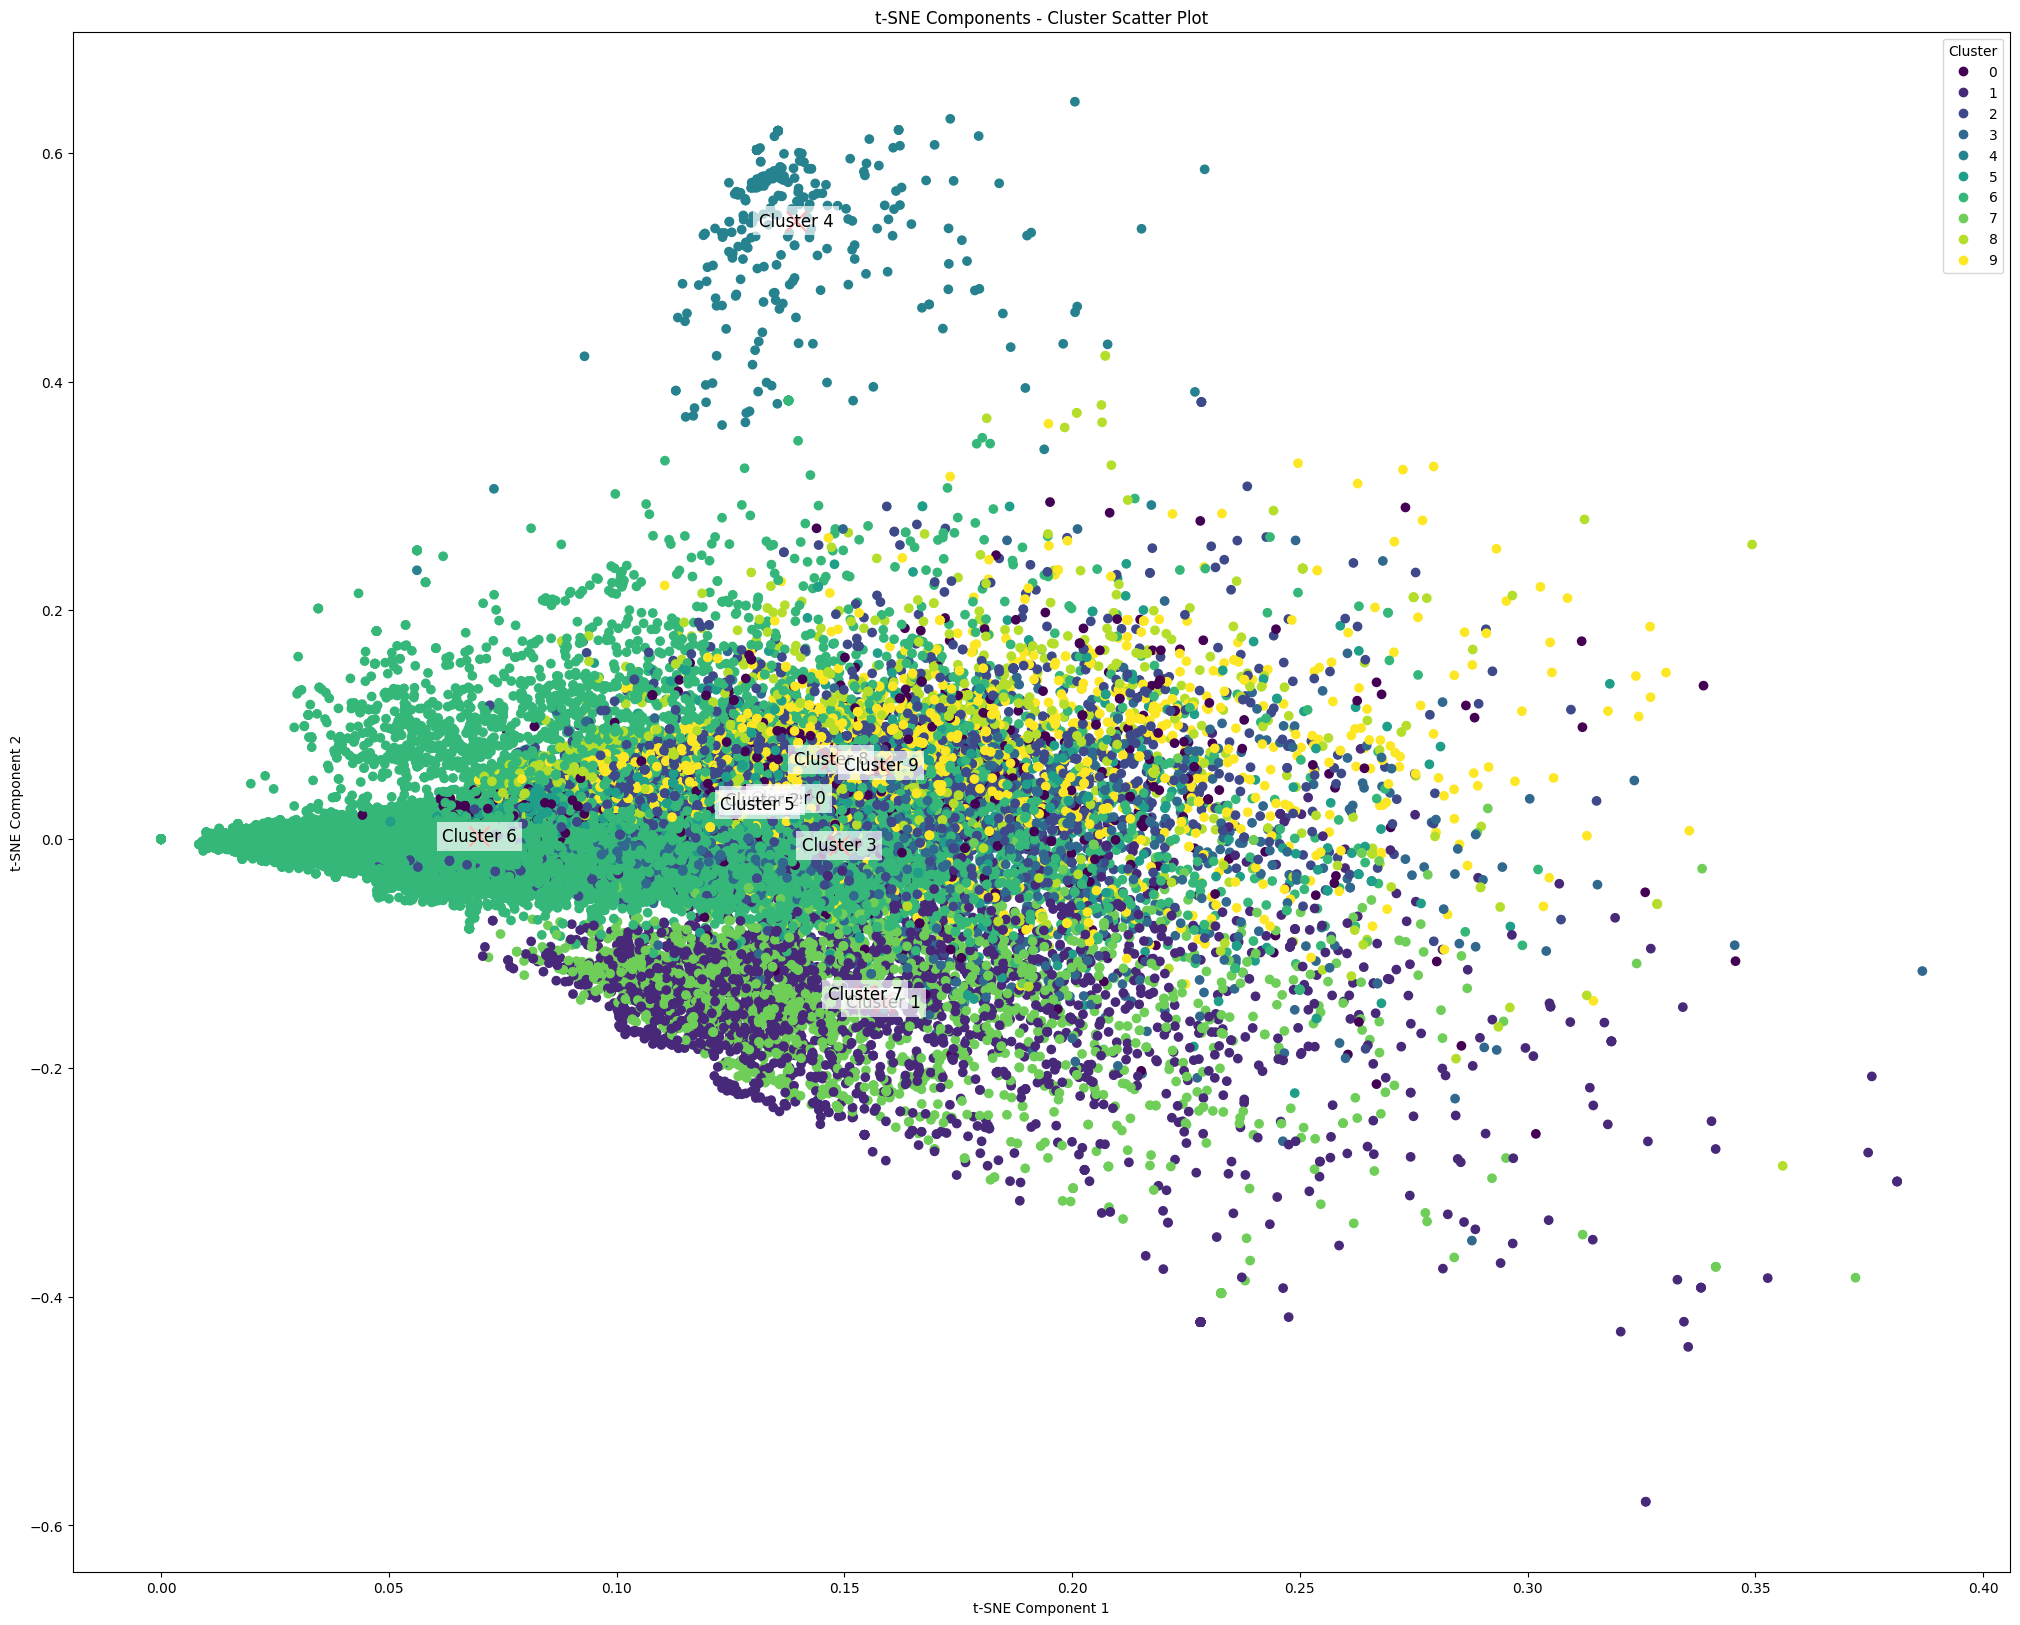

True number of documents in each category according to the class labels: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
Number of elements assigned to each cluster: [ 1073  2352  3357  1840   315  1380 34169  2128  1407  1979]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_tfidf, cluster_sizes_tfidf = np.unique(kmeans_two.labels_, return_counts=True)

#Visualize the clusters using the SVD reduced data
plt.figure(figsize=(25, 20))
cluster_labels = kmeans_two.labels_

scatter = plt.scatter(embeddings_2d_two[:, 0], embeddings_2d_two[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_two):
    plt.text(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_two}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_tfidf}")


## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_two, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_two, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_two, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_two, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 9.57 ± 0.00 s 
Homogeneity: 0.020 ± 0.000
Completeness: 0.037 ± 0.000
V-measure: 0.026 ± 0.000
Adjusted Rand-Index: 0.002 ± 0.000
Silhouette Coefficient: 0.018 ± 0.000


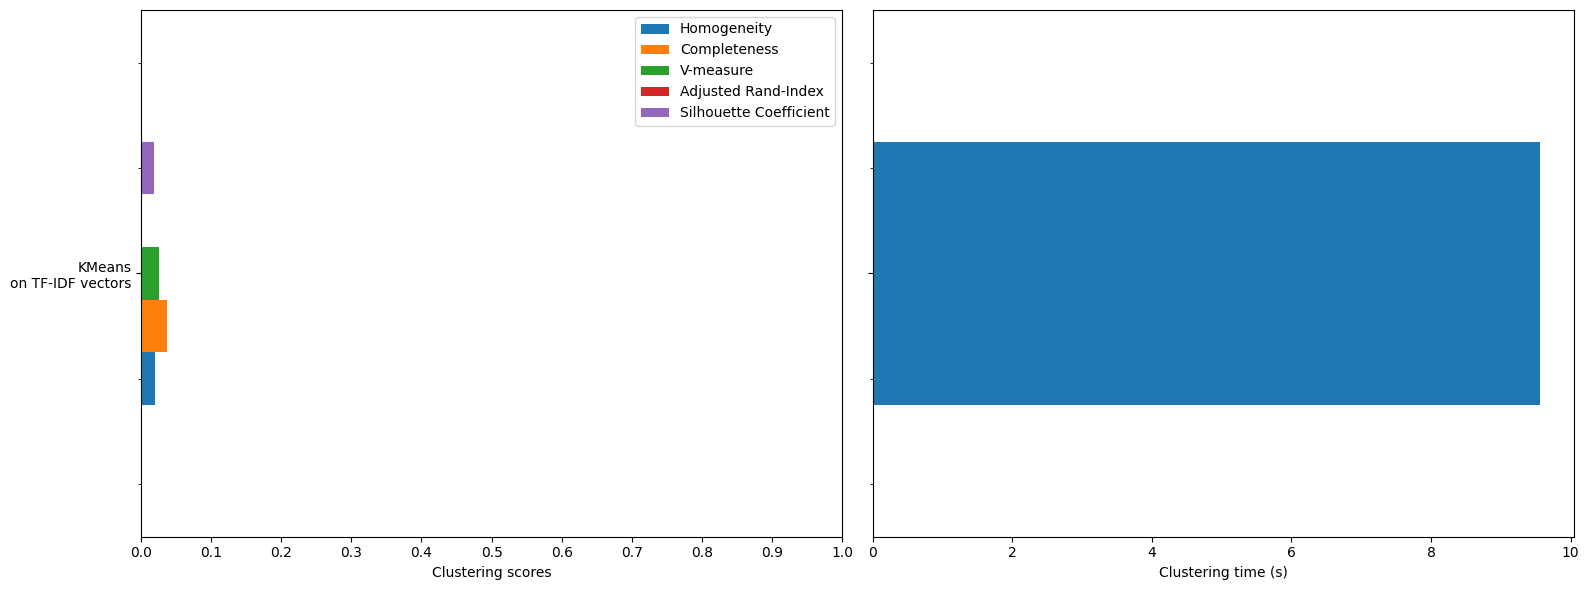

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_two, X_tfidf_two, name="KMeans\non TF-IDF vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

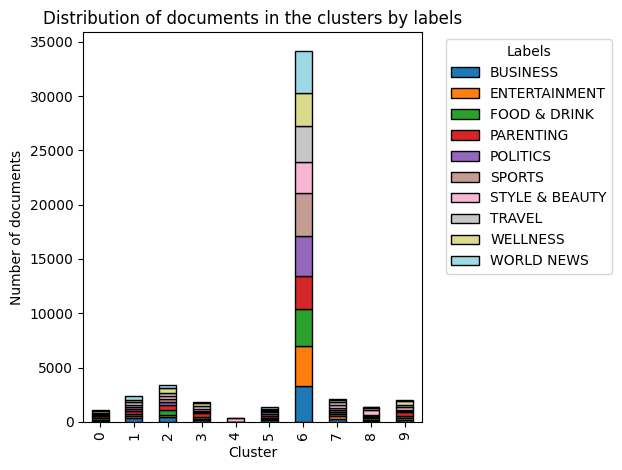

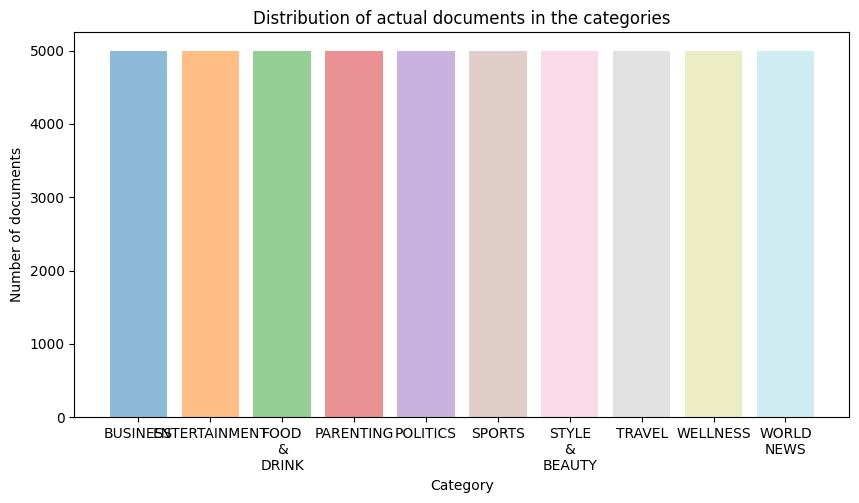


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  FOOD & DRINK  PARENTING  POLITICS  \
cluster                                                                  
0                 94             85           182        148        70   
1                341            218           146        258       207   
2                428            211           475        483       240   
3                171            107           189        316       114   
4                  0              0             7          0         0   
5                141            147            75        137       253   
6               3268           3695          3414       3017      3716   
7                269            291           139        181       216   
8                116             99           121        145        58   
9                172            147           252        315       126   

true_label  SPORTS  STYLE & BEAUTY  TRAVEL  WEL

In [ ]:
x_labels = news_two_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_two_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_two = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_two)), category_sizes_two, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_two)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_tfidf):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_two):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_two_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_two_df[news_two_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the TF-IDF vectors of the documents in the current category.
        category_tfidf = X_tfidf_two[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_tfidf)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for WELLNESS: 0.019395716692352964
Average Cosine Similarity for POLITICS: 0.013612425751834755
Average Cosine Similarity for ENTERTAINMENT: 0.009752036531735144
Average Cosine Similarity for TRAVEL: 0.017989915814842976
Average Cosine Similarity for STYLE & BEAUTY: 0.020921774665770228
Average Cosine Similarity for PARENTING: 0.02465654591639586
Average Cosine Similarity for FOOD & DRINK: 0.015388358937147358
Average Cosine Similarity for WORLD NEWS: 0.013723887122257226
Average Cosine Similarity for BUSINESS: 0.015451500508052869
Average Cosine Similarity for SPORTS: 0.010843529678521669


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_two_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_two_df[news_two_df['Category'] == category1].index
    category1_vector = X_tfidf_two[indices1]

    #Extract the documents in the second category
    indices2 = news_two_df[news_two_df['Category'] == category2].index
    category2_vector = X_tfidf_two[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between WELLNESS and POLITICS: 0.009072641602455852
Average Cosine Similarity between ENTERTAINMENT and TRAVEL: 0.007784680736674151
Average Cosine Similarity between STYLE & BEAUTY and PARENTING: 0.011296222020149654
Average Cosine Similarity between FOOD & DRINK and WORLD NEWS: 0.005100608959580405
Average Cosine Similarity between BUSINESS and SPORTS: 0.0068796294913933366


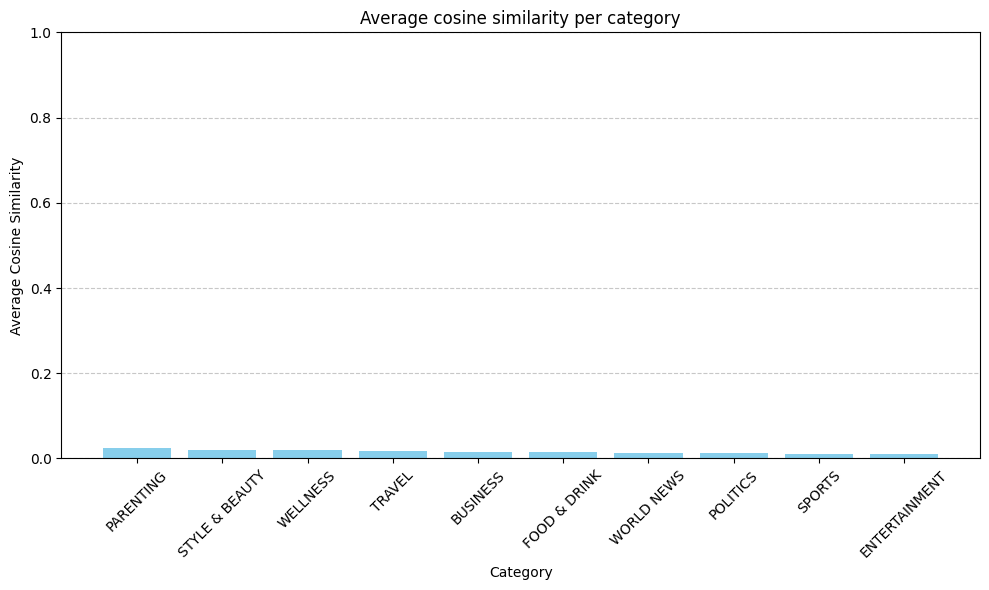

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

Now we want to show the top ten terms.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10

#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k_two):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans_two.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, X_tfidf_two)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

 The most important words in these documents are based on their TF-IDF value. We create a heatmap which visually represents the top words for each cluster

Top words for Cluster 0: good, year, happi, time, suggest, drop, hate, free, click, choic
Top words for Cluster 1: time, year, famili, friend, spend, dinner, spent, play, american, love
Top words for Cluster 2: make, new, life, woman, piec, know, emot, process, understand, actual
Top words for Cluster 3: day, peopl, world, life, let, way, think, time, know, need
Top words for Cluster 4: check, facebook, twitter, sure, look, pinterest, want, shop, tumblr, photo
Top words for Cluster 5: say, day, known, life, thing, hit, author, center, wish, note
Top words for Cluster 6: food, love, turkey, avoid, felt, fit, financi, final, film, figur
Top words for Cluster 7: said, new, york, appear, prevent, win, shot, everyon, air, seven
Top words for Cluster 8: come, look, like, clinton, week, monday, spot, kind, think, tip
Top words for Cluster 9: like, check, follow, facebook, make, pinterest, twitter, style, mom, light


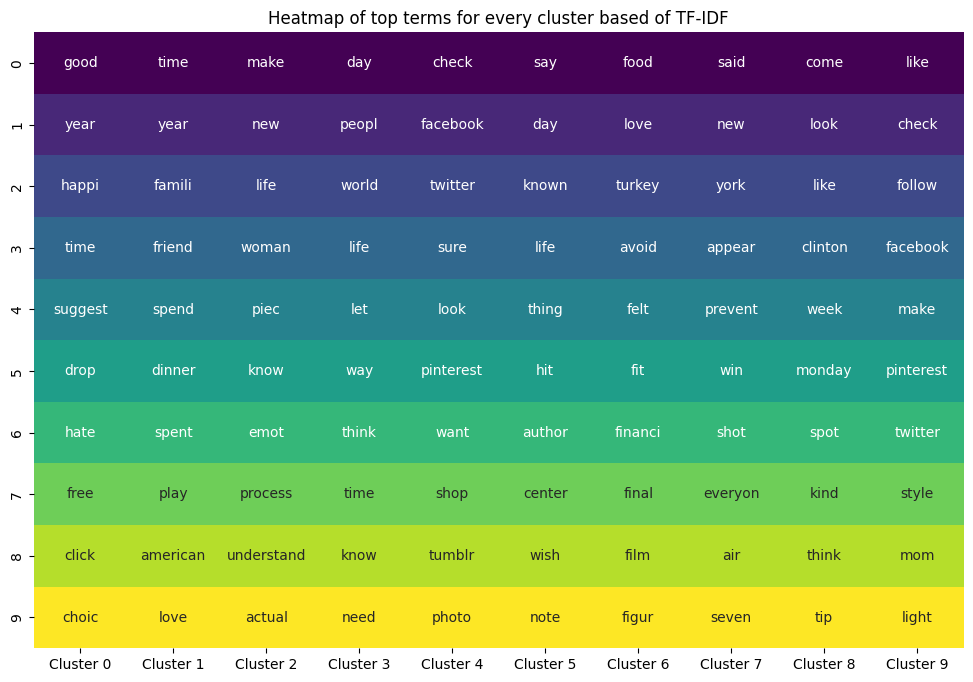

In [ ]:
#Retrieve the feature names (terms) from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

#Extract the most important words based on TF-IDF for the top documents in each cluster
num_top_terms = 10
top_words_per_cluster = []

for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    #Extract the TF-IDF values ​​for the top documents in the cluster
    cluster_tfidf = X_tfidf_two[top_document_indices]

    #Sum the TF-IDF values ​​for each word across all top documents
    summed_tfidf = np.sum(cluster_tfidf.toarray(), axis=0)

    #Choose the words with the highest TF-IDF values
    top_term_indices = np.argsort(summed_tfidf)[::-1][:num_top_terms]
    top_words = [terms[i] for i in top_term_indices]
    top_words_per_cluster.append(top_words)

#Output the top words for each cluster
for i, top_words in enumerate(top_words_per_cluster):
    print(f"Top words for Cluster {i}: {', '.join(top_words)}")

#Create the heatmap
heatmap_df = pd.DataFrame(top_words_per_cluster, index=[f'Cluster {i}' for i in range(true_k_two)])
heatmap_df = heatmap_df.T

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_df.apply(lambda x: pd.factorize(x)[0]),
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False
)
plt.title("Heatmap of top terms for every cluster based of TF-IDF")
plt.show()


# **TF-IDF On The Third Dataset**

## **TF-IDF**

The TF-IDF vectorizer is initialized with various parameters. The "max_df" parameter ignores words that appear in more than 95% of the documents and "min_df" parameter ignores words that appear in less than 5 documents. "stop_word" also removes common English stopwords

In [ ]:
#Initialize TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.95,
    max_features=768,
    stop_words='english',
    use_idf=True
)
#Record the start time for vectorization
t0 = time()

#Transform the input into TF-IDF weighted vectors
X_tfidf_three = vectorizer.fit_transform(news_three_df['Preprocessed_News'])

#Display the time for the vectorization and the shape of the resulting matrix
print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf_three.shape[0]}, n_features: {X_tfidf_three.shape[1]}")

vectorization done in 2.015 s
n_samples: 108774, n_features: 768


TF-IDF values ​​of the first document. The 0 in the tuple represents the document and the second number in the tuple represents, for example, the 501th feature in the vocabulary.

In [ ]:
#Display the TF-IDF Value of the first document
print("First document: " + text_data_three[0])
print("TF-IDF values for the document: ")
print(X_tfidf_three[0])

First document: closer look watersplit solar fuel potenti
TF-IDF values for the document: 
  (0, 501)	0.5820415894135618
  (0, 262)	0.6368037204980157
  (0, 391)	0.5056763883679163


In the first document the 262th feature has the highest TF-IDF score. The 262th feature represents the word 'fuel'.

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
print(feature_names[262])

fuel


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data_three[9])
print("Second news article:")
print(text_data_three[47])
print("Embedding of first document:")
print(X_tfidf_three[9])
print("Embedding of second document:")
print(X_tfidf_three[47])

First news article:
nasa invit engin student help harvest water mar moon
Second news article:
nasa insight lander show what beneath mar surfac
Embedding of first document:
  (0, 434)	0.4522555132143496
  (0, 737)	0.4305771303515061
  (0, 293)	0.3512403563443635
  (0, 656)	0.4008288719053192
  (0, 439)	0.3888663444807849
  (0, 406)	0.418112041488681
Embedding of second document:
  (0, 666)	0.5177105636767105
  (0, 329)	0.5149599066446674
  (0, 439)	0.46529691143012764
  (0, 406)	0.5002907664744995


In [ ]:
print("First news article:")
print(text_data_three[22159])
print("Second news article:")
print(text_data_three[22021])
print("Embedding of first document:")
print(X_tfidf_three[22159])
print("Embedding of second document:")
print(X_tfidf_three[22021])

First news article:
man utd need extratim penalti fernand edg past copenhagen
Second news article:
chelsea fc look fund move sign yearold report
Embedding of first document:
  (0, 724)	0.527468781886629
  (0, 473)	0.5849829659966624
  (0, 444)	0.4624510482273676
  (0, 400)	0.4070757197649996
Embedding of second document:
  (0, 118)	0.43248771048750356
  (0, 263)	0.453399830851378
  (0, 612)	0.3838604337451912
  (0, 555)	0.30765976566006525
  (0, 764)	0.4620787170958346
  (0, 391)	0.389695867141588


Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_three[22159].reshape(1, -1), X_tfidf_three[22021].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.0


Cosine similarity between science article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_three[9].reshape(1, -1), X_tfidf_three[47].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.39011590275462327


Cosine similarity between sports and science article




In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity(X_tfidf_three[9].reshape(1, -1), X_tfidf_three[22159].reshape(1, -1))[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.0


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_three = KMeans(
    n_clusters=true_k_three,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(X_tfidf_three)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reduce dimensionality of embeddings using Truncated SVD
svd = TruncatedSVD(n_components=2, random_state=42)
embeddings_2d_three = svd.fit_transform(X_tfidf_three)

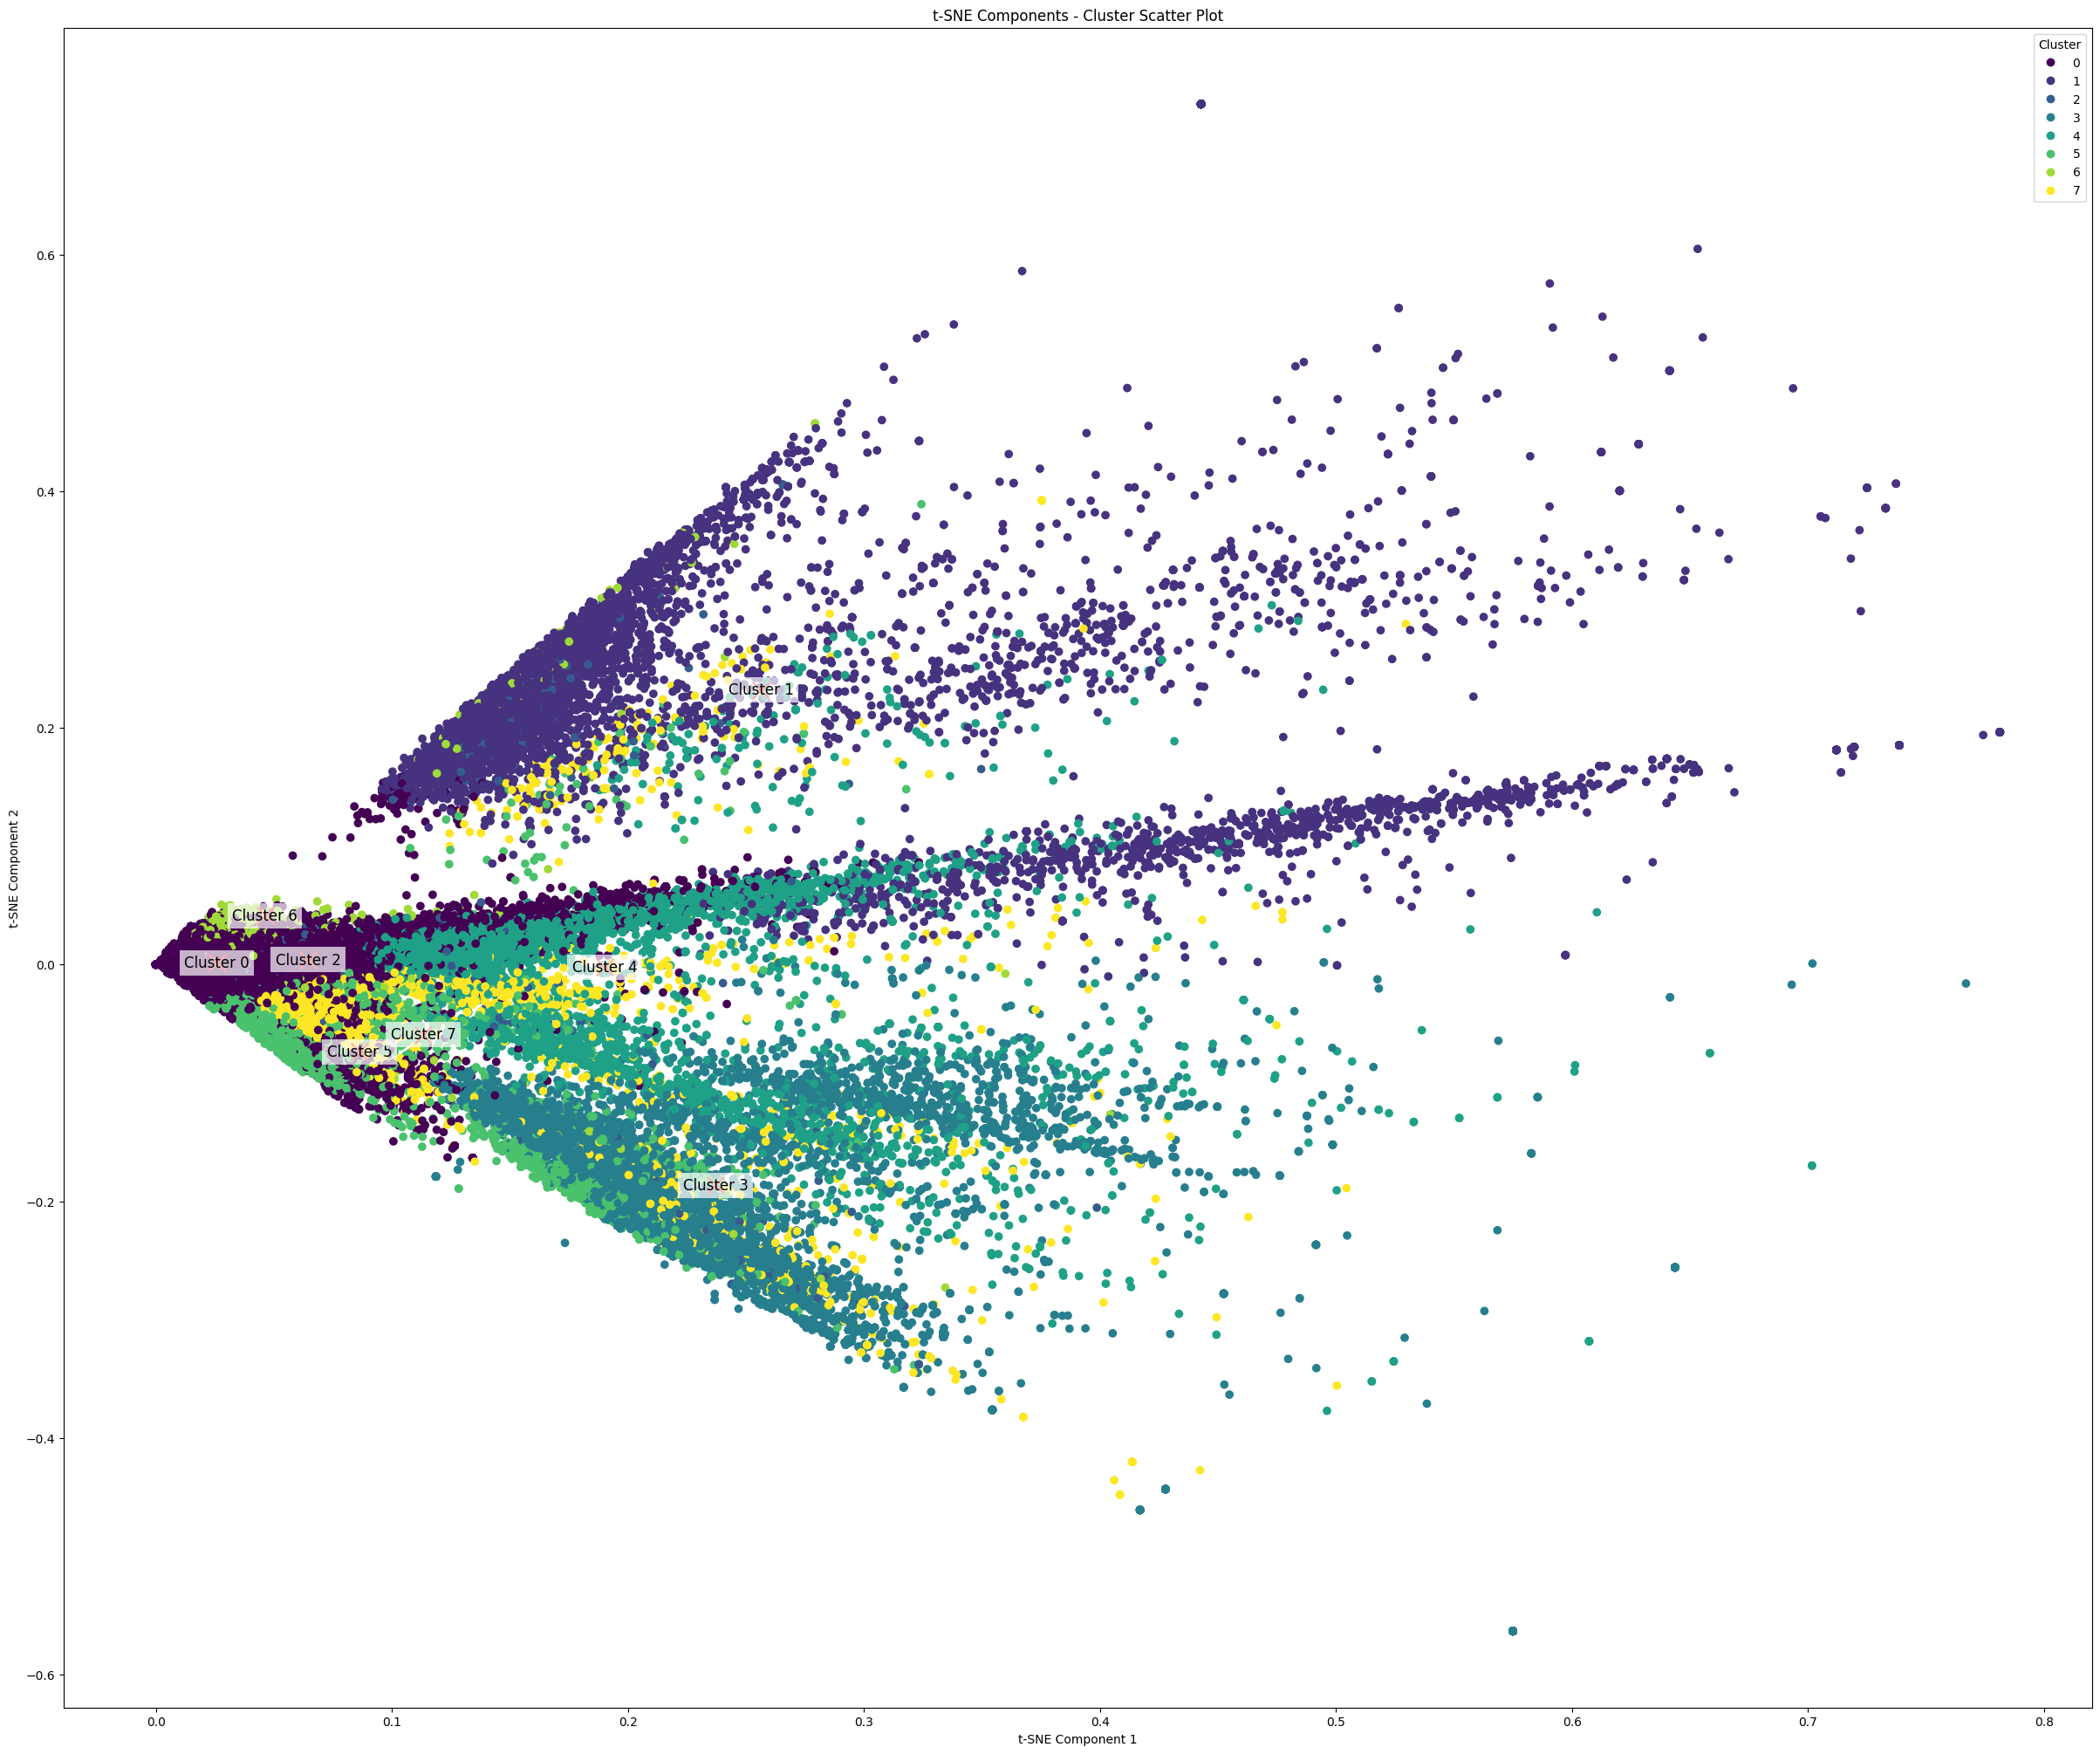

True number of documents in each category according to the class labels: [15000 15000 15000 15000  3774 15000 15000 15000]
Number of elements assigned to each cluster: [76495  7342  1364  8075  5875  3393  1987  4243]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_tfidf, cluster_sizes_tfidf = np.unique(kmeans_three.labels_, return_counts=True)

#Visualize the clusters using the SVD reduced data
plt.figure(figsize=(30, 25))
cluster_labels = kmeans_three.labels_

scatter = plt.scatter(embeddings_2d_three[:, 0], embeddings_2d_three[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_three):
    plt.text(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_three}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_tfidf}")


## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_three, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_three, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_three, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_three, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 11.32 ± 0.00 s 
Homogeneity: 0.089 ± 0.000
Completeness: 0.156 ± 0.000
V-measure: 0.113 ± 0.000
Adjusted Rand-Index: 0.022 ± 0.000
Silhouette Coefficient: 0.021 ± 0.000


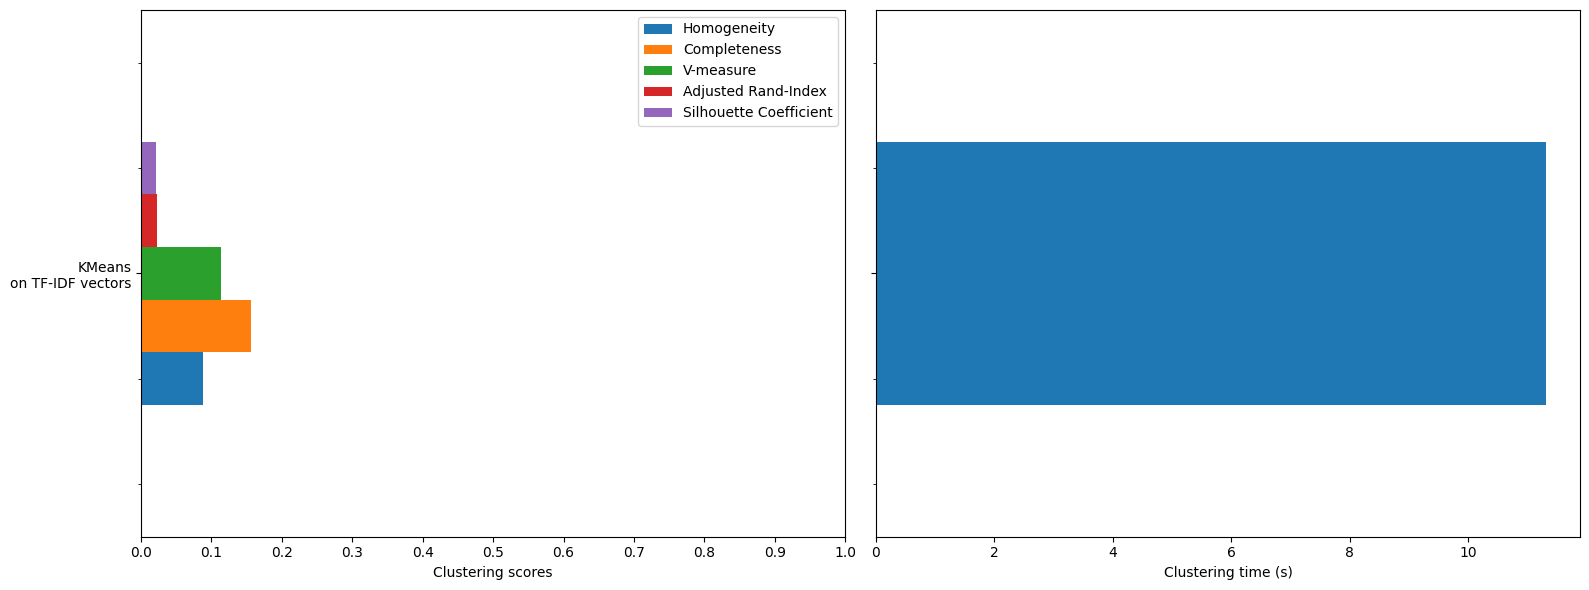

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_three, X_tfidf_three, name="KMeans\non TF-IDF vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

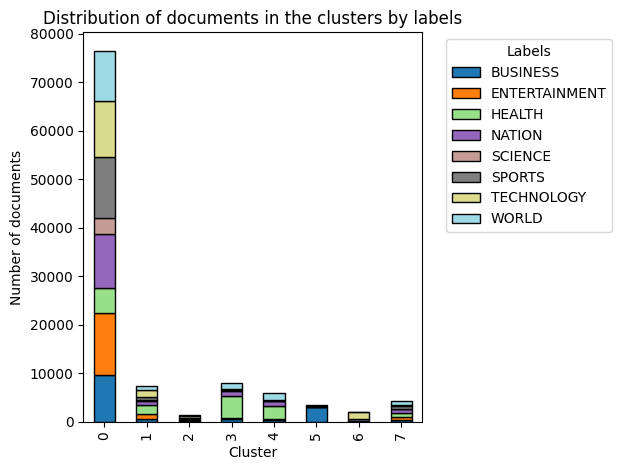

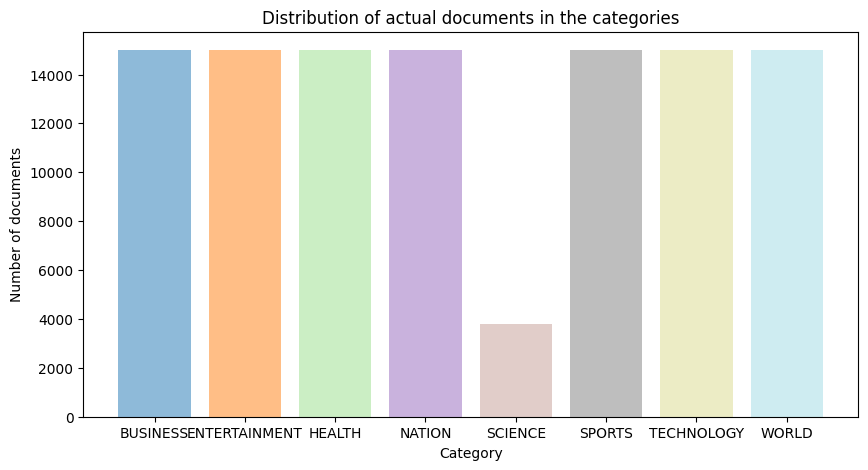


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  HEALTH  NATION  SCIENCE  SPORTS  \
cluster                                                                
0               9625          12732    5192   11128     3259   12683   
1                609           1082    1702     839      302     489   
2                244             77      71     105        1     395   
3                610            234    4415    1184       49     245   
4                482            160    2694     929       31     172   
5               3038              7     106      26        9      19   
6                 28             97       4      17        5     507   
7                364            611     816     772      118     490   

true_label  TECHNOLOGY  WORLD  
cluster                        
0                11491  10385  
1                 1471    848  
2                  242    229  
3                  135   1203  
4                   52 

In [ ]:
x_labels = news_three_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_three_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_three = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_three)), category_sizes_three, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_three)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_tfidf):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_three):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_three_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_three_df[news_three_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the TF-IDF vectors of the documents in the current category.
        category_tfidf = X_tfidf_three[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_tfidf)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for SCIENCE: 0.026489099729910804
Average Cosine Similarity for TECHNOLOGY: 0.017255922215041956
Average Cosine Similarity for HEALTH: 0.0372243582671933
Average Cosine Similarity for WORLD: 0.013235110941402749
Average Cosine Similarity for ENTERTAINMENT: 0.010780363855381569
Average Cosine Similarity for SPORTS: 0.01441939823168495
Average Cosine Similarity for BUSINESS: 0.019070596698002408
Average Cosine Similarity for NATION: 0.01058704219611394


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_three_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  # Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_three_df[news_three_df['Category'] == category1].index
    category1_vector = X_tfidf_three[indices1]

    #Extract the documents in the second category
    indices2 = news_three_df[news_three_df['Category'] == category2].index
    category2_vector = X_tfidf_three[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between SCIENCE and TECHNOLOGY: 0.005654620068630763
Average Cosine Similarity between HEALTH and WORLD: 0.014805800501739453
Average Cosine Similarity between ENTERTAINMENT and SPORTS: 0.005784502972411185
Average Cosine Similarity between BUSINESS and NATION: 0.006030791332145309


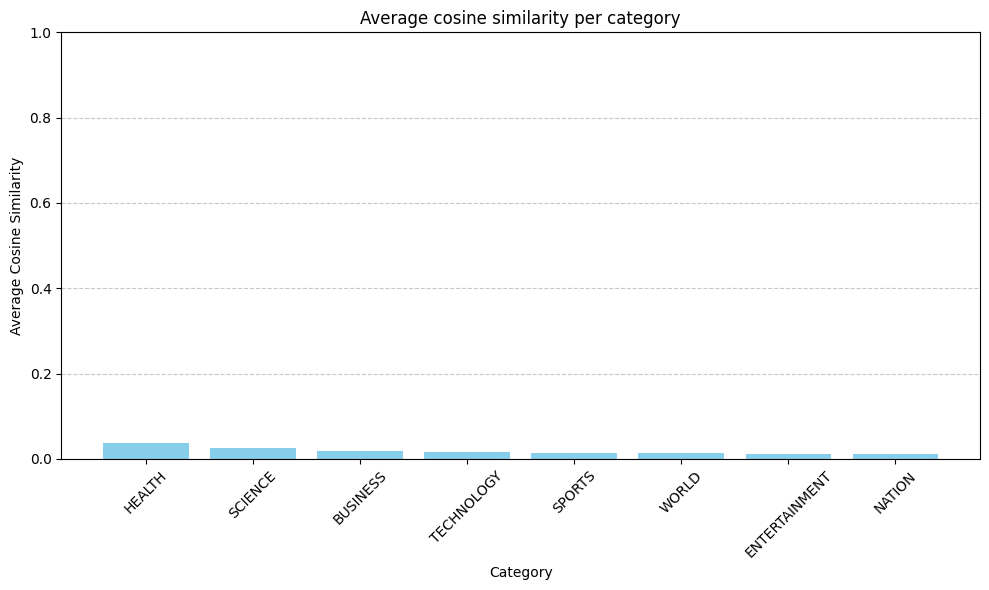

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

Now we want to show the top ten terms.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10

#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k_three):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans_three.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, X_tfidf_three)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

 The most important words in these documents are based on their TF-IDF value. We create a heatmap which visually represents the top words for each cluster

Top words for Cluster 0: man, star, transfer, citi, news, live, champion, unit, leagu, report
Top words for Cluster 1: market, new, offer, studi, stock, restrict, facebook, report, insid, design
Top words for Cluster 2: deal, new, sign, target, pandem, mobil, film, australia, offer, appl
Top words for Cluster 3: covid, coronaviru, test, posit, drive, say, intern, case, new, set
Top words for Cluster 4: coronaviru, covid, vaccin, case, test, follow, fresh, free, franc, fortnit
Top words for Cluster 5: market, new, research, analysi, report, reveal, studi, like, driver, opportun
Top words for Cluster 6: game, say, develop, sport, confirm, possibl, wont, chang, princ, harri
Top words for Cluster 7: xbox, say, microsoft, epic, gold, seri, chang, appl, live, releas


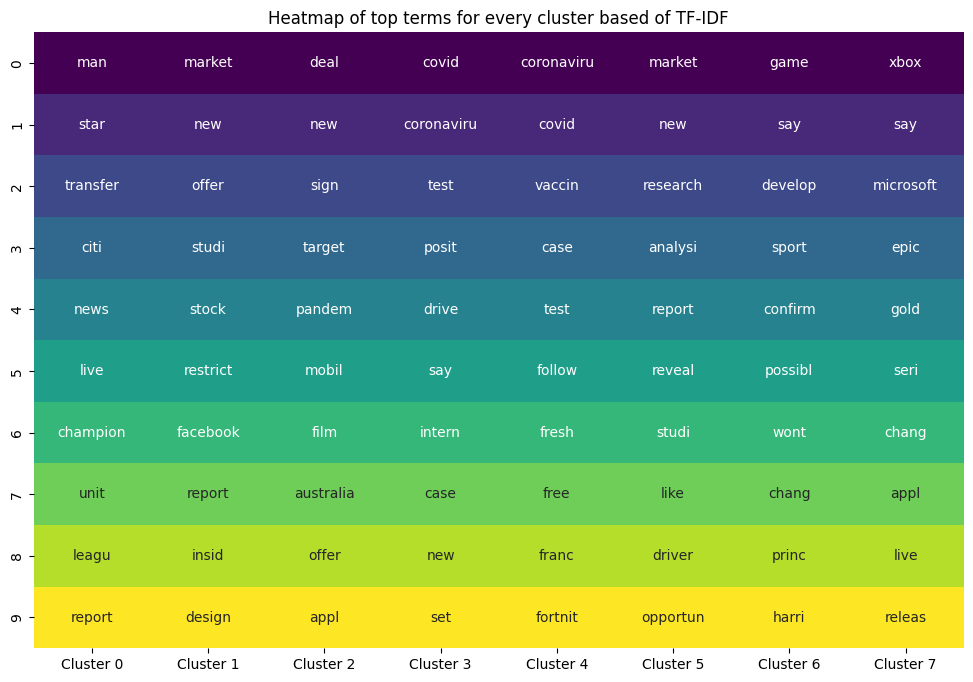

In [ ]:
#Retrieve the feature names (terms) from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

#Extract the most important words based on TF-IDF for the top documents in each cluster
num_top_terms = 10
top_words_per_cluster = []

for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    #Extract the TF-IDF values ​​for the top documents in the cluster
    cluster_tfidf = X_tfidf_three[top_document_indices]

    #Sum the TF-IDF values ​​for each word across all top documents
    summed_tfidf = np.sum(cluster_tfidf.toarray(), axis=0)

    #Choose the words with the highest TF-IDF values
    top_term_indices = np.argsort(summed_tfidf)[::-1][:num_top_terms]
    top_words = [terms[i] for i in top_term_indices]
    top_words_per_cluster.append(top_words)

#Output the top words for each cluster
for i, top_words in enumerate(top_words_per_cluster):
    print(f"Top words for Cluster {i}: {', '.join(top_words)}")

#Create the heatmap
heatmap_df = pd.DataFrame(top_words_per_cluster, index=[f'Cluster {i}' for i in range(true_k)])
heatmap_df = heatmap_df.T

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_df.apply(lambda x: pd.factorize(x)[0]),
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False
)
plt.title("Heatmap of top terms for every cluster based of TF-IDF")
plt.show()


# **Sources**

The datasets,code, different methods and explanations are from these sources:

* https://www.kaggle.com/datasets/rafsunahmad/classify-news-into-category
* https://www.kaggle.com/datasets/setseries/news-category-dataset
* https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset
*   https://github.com/Tamago55/AI-PaperMiner
*   https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
* https://www.learndatasci.com/glossary/cosine-similarity/
* ChatGPT to generate code and text
* S. Qaiser and R. Ali, “Text mining: Use of tf-idf to examine the relevance of
words to documents,” International Journal of Computer Applications, 2018.
https://doi.org/10.5120/IJCA2018917395.
